
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1
---

##**GRUPO 17**

**Conrrero, Agustina**

**Sanchez Herrera, Carlos**

**Serrantes, Sebastian**

---

# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

## Importaciones

In [ ]:
%matplotlib inline
plt.close('all')

In [ ]:
!pip install rich

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 237 kB 25.2 MB/s 
     |████████████████████████████████| 51 kB 8.5 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

from rich.console import Console
from rich.table import Table

import seaborn as sns
from pandas_profiling import ProfileReport
import matplotlib.gridspec as gridspec

%matplotlib inline
%matplotlib notebook

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [ ]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
print(type(boston))

<class 'sklearn.utils.Bunch'>


In [ ]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

**1.** El conjunto de datos, tal como consta en la [descripción de los mismos](#Carga-del-Conjunto-de-Datos), se trata de precios de viviendas en Boston en base a 13 variables numéricas y categóricas. Además, se tiene la variable objetivo: valor mediano de la casa. Por último, se cuenta con 506 instancias, las cuales sirven para entrenar el modelo y testearlo. Estos datos están tomados de un paper de Harrison, D. and Rubinfeld, D.L.: [Hedonic prices and the demand for clean air](https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air).

**2.** La variable objetivo es **MEDV, el valor mediano de una propiedad en Boston** (en millones de dolares). Lo que se debe tener en cuenta es que el dataset es del año 1978, por lo que si no se tienen en cuenta los incrementos por inflación, cualquier algoritmo de regresión multivariable que se haga con base en estos datos, la prediciión de valor de las viviendas serán para el año de publicación de paper, valor desactualizado para la presente época.

**3.** Se dispone de 13 variables según se explica en la [descripción del dataset](#Carga-del-Conjunto-de-Datos).

- CRIM: Tasa de criminalidad.
- ZN: Proporción de suelo residencial zonificado para lotes de más de 25,000 pies cuadrados.
- INDUS: Proporción de acres comerciales no minoristas por ciudad.
- CHAS: Variable ficticia de Charles River (= 1 si la casa limita con el ría; 0 en caso contrario).
- NOX: Concentración de óxidos nítricos (partes por 10 millones), es un indicio del nivel de contaminación.
- RM: Promedio de habitaciones.
- AGE: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
- DIS: Distancias ponderadas a 5 zonas de trabajo en Boston.
- RAD: Índice de accesibilidad a autopistas.
- TAX: Tasa de impuesto a la propiedad de valor total por 10,000 dólares.
- PTRATIO: Realción entre cantidad de alumnos y maestros.
- B: Atributo que da un indicio de la población de personas de color (específicamente negros). B = 0 (63% de población negra). B aumenta en la medida en que disminuye la población negra.
- LSTAT: Porcentaje de población de bajo estatus

**4.** A priori intuimos que los atributos más determinantes para la predicción están relacionados con características de tipo geográfico. Asimismo, consideramos importante la tasa de impuestos, la tasa de criminalidad y por último, la cantidad de habitaciones que tiene la propiedad.

**5.** Este dataset presenta problemas éticos; de hecho, esto está explicito en la misma documentación de scikit.learn a la que se puede acceder haciendo [click aquí](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn-datasets-load-boston). El dataset es obsoleto en la versión 1.0 y ya no estará disponible en la versión 1.2.

Seguramente la razón de esto son los sesgos raciales implícitos en las variables LSTAT (porcentaje de población de bajo estatus social) y B (que depende de la proporción de gente negra).

Estos datos presentan sesgos que ponen en evidencia ciertos paradigmas sociales que con justa razón se pueden entender como discriminatorios. Por tal razón, pretender hacer predicciones con este dataset podría ofender a algunas personas o exponernos a acusaciones por discriminación y racismo.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

A modo de preparación de los datos, creamos un DataFrame de Pandas con la información del dataset para usarlo en el ejercicio y el resto del Notebook.

In [ ]:
data = pd.DataFrame(data=boston.data, columns=boston.feature_names)
data['MEDV'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**1.** En la próxima celda se encuentra una gráfica del valor medio de la propiedad en miles de dólares (MEDV) en función de cada uno de los atributos. 13 gráficos en total.

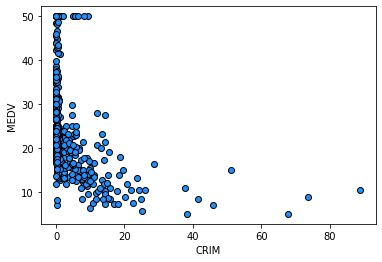

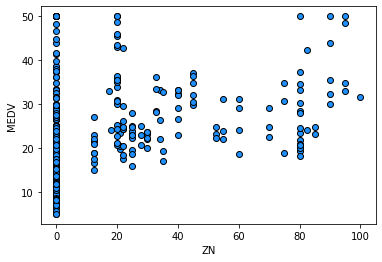

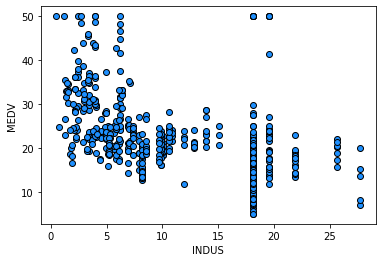

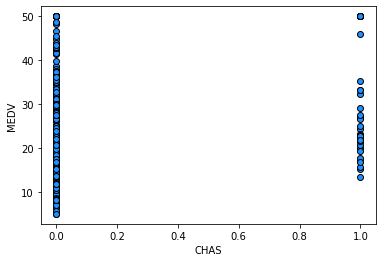

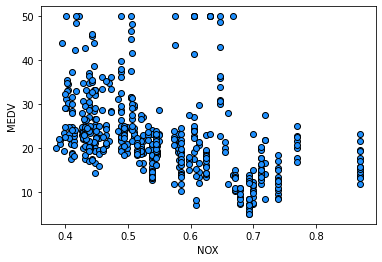

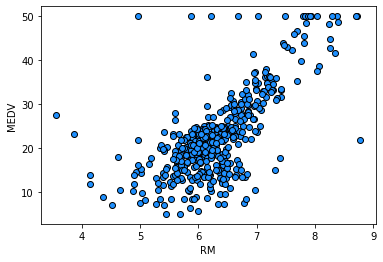

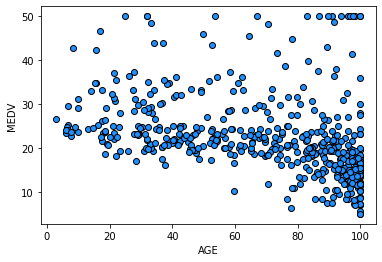

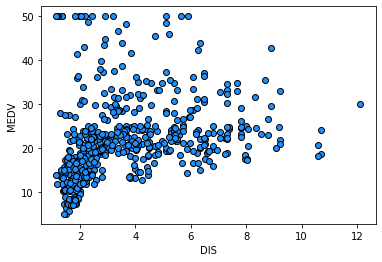

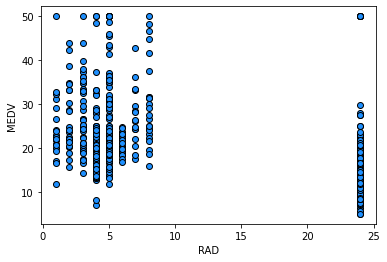

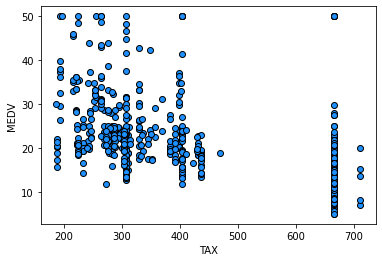

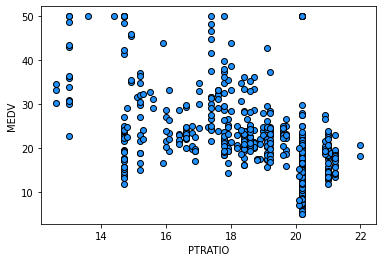

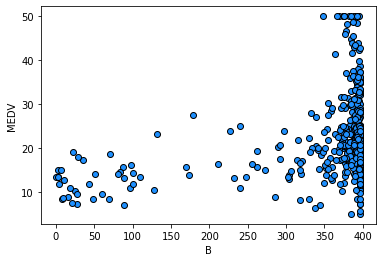

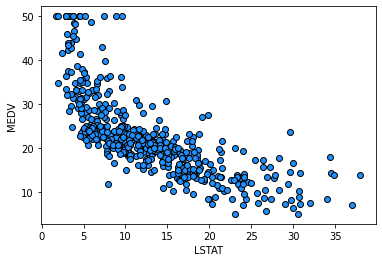

In [ ]:
for feature in boston['feature_names']:
    plt.figure()
    plt.scatter(data[feature], data.MEDV, facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.show()

In [ ]:
#Codigo  para arreglar el ploteo de graficos que rompe la celda anterior

#%matplotlib inline
#plt.close('all')

**2. y 3.** Después de estudiar "a ojo" cada una de las gráficas se puede apreciar que los atributos que más influyen sobre el valor medio de la propiedad, y por ende son los más informativos para la predicción son, en orden de mayor a menor:
- LSTAT: El valor de las viviendas disminuye notablemente en la medida en que se encuentra en zonas pobladas por personas de bajo estatus social.
- RM: El valor de la vivienda aumenta notablemente en función de la cantidad de habitaciones que posee.
- DIS: El valor de las viviendas aumenta en la medida en que se alejan de zonas que seguramente son industriales, por ser estas concentradores de empleo. Esta tendencia es coherente con NOX, que permite entender también que el precio de las viviendas disminuyen con el nivel de contaminación, que se encuentra muy relacionado con la industria.
- CRIM: Queda claro con este índice que las viviendas tienen poco valor en zonas de alta criminalidad.
**- B: Este índice pone en evidencia que los precios de las vivienda son bajos en zonas con alta población de personas de color.**

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

**1.** Seleccionamos el atributo RM (cantidad de habitaciones), en virtud de que, entendemos, tiene mayor influencia sobre el valor de la vivienda.

In [ ]:
feature = 'RM'
X = data[[feature]]
y = data.MEDV

**2.** Instanciación y entrenamiento del atributo seleccionado.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

regr = LinearRegression()
regr.fit(X_train, y_train)


LinearRegression()

**3.** Evaluación mediante cálculo del error medio cuatrático.

In [ ]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print("MSE train : {:.2f} ".format(train_error))
print("MSE test: {:.2f}".format(test_error))

MSE train : 42.82 
MSE test: 46.91


**4.** Gráfica del modelo resultante

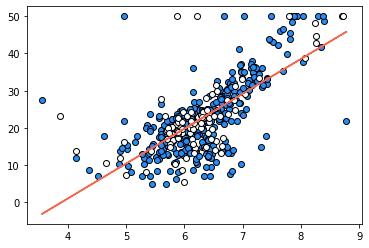

In [ ]:
plt.figure()
plt.scatter(X_train, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(X, regr.predict(X), color="tomato", label="modelo")
#plt.title(feature)
#plt.legend()
plt.show()

**5.** Sabemos que un modelo es bueno cuando los puntos se encuentran lo más cercanos posibles a la linea recta. Si bien para algunos valores este modelo predice correctamente, se puede observar que existe una dispersión entre los valores, lo cual nos habla de un cierto grado de variabilidad del modelo.

En línea general, el modelo aparenta tener un buen comportamiento ya que representa la realidad que expresan los datos, es decir, que el valor medio de la propiedad es directamente proporcional a la cantidad de habitaciones. Sin embargo, la mayor objeción que se puede hacer del mismo es la predicción de un valor nulo para una propiedad con 4 habitaciones.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [ ]:
# 1.
def instantiate_pol_regr (degree, X, y):
    '''Instancia y entrena una regresión polinomial de grado deegree.
    
    Parámetros:
    -----------
    deegre: Grado del polinomio
    X: Conjunto de atributos
    y: Conjunto de datos objetivo
    
    Salida:
    -------
    model: Objeto con el modelo de la regresión polinimial
    '''
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
    model = make_pipeline(pf, lr)
    model.fit(X, y)
    return model

reg_errores = []
max_degree = 35

deegrees = range(2, max_degree)

titulo = "Errores del modelo."
columnas = ["Grado del polinomio",
            "Error de entrenamiento",
            "Error de evaluación"]

table = Table(title=titulo)

for columna in columnas:
    table.add_column(columna, justify="center", style="blue")
            
for degree in deegrees:
    model = instantiate_pol_regr(degree, X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_test)
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_test, y_val_pred)
    reg_errores.append([degree, round(train_error, 2), round(val_error, 2)])
    table.add_row(str(degree),
                  str(round(train_error, 2)),
                  str(round(val_error, 2)))
    
console = Console()
console.print(table)

                         Errores del modelo.                          
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Grado del polinomio ┃ Error de entrenamiento ┃ Error de evaluación ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│          2          │         37.75          │        39.79        │
│          3          │          36.4          │        39.83        │
│          4          │         34.81          │        41.55        │
│          5          │         33.13          │        41.04        │
│          6          │         33.13          │        41.01        │
│          7          │         33.06          │        42.39        │
│          8          │         33.06          │        42.4         │
│          9          │         32.85          │        46.04        │
│         10          │          32.8          │        44.97        │
│         11          │         32.75          │        43.75        │
│         12          │         32.72          │        42.55        │
│         13          │         32.69          │        41.47        │
│         14          │         32.68          │        40.53        │
│         15          │         32.66          │        39.82        │
│         16          │         32.65          │        39.26        │
│         17          │         32.64          │        38.84        │
│         18          │         32.63          │        38.58        │
│         19          │         32.64          │        38.47        │
│         20          │         33.64          │        40.62        │
│         21          │         33.78          │        41.19        │
│         22          │         33.92          │        41.77        │
│         23          │         34.07          │        42.29        │
│         24          │         34.22          │        42.74        │
│         25          │         34.38          │        43.12        │
│         26          │         34.56          │        43.44        │
│         27          │         35.93          │        45.59        │
│         28          │         36.69          │        46.61        │
│         29          │         37.67          │        47.92        │
│         30          │         38.91          │        49.55        │
│         31          │         40.43          │        51.54        │
│         32          │         42.27          │        53.95        │
│         33          │         44.44          │        56.8         │
│         34          │         46.97          │        60.16        │
└─────────────────────┴────────────────────────┴─────────────────────┘

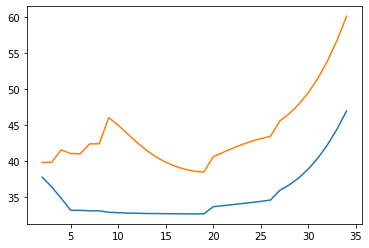

In [ ]:
# 2. Graficar curvas de error acá.

degree = [x[0] for x in reg_errores]
train_error = [x[1] for x in reg_errores]
test_error = [x[2] for x in reg_errores]

plt.figure()
plt.plot(degree, train_error)
plt.plot(degree, test_error)
plt.show()

**3.** A simple vista, resulta extraño que el error de evaluación disminuya para polinomios de grado 17 o similar. Esto podría ser debido a que la cantidad de datos de evaluación no son suficientes, y es probable que, si se elige un polinomio de este grado, los futuros datos no puedan ajustar bien debido a la complejidad del modelo.

Es por ello que, decidimos elegir el polinomio de grado 5 ya que presenta uno de los errores de entrenamiento más bajos y un error de evaluación no tan elevado. 


In [ ]:
#Vuelvo a dividir el dataset porque necesito las tablas en otros formatos

In [ ]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [ ]:
# 1. Resolver acá.    #VAMOS A UTILIZAR EL ATRIBUTO RM
feature = 'RM'  
selector = (boston['feature_names'] == feature)

X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]

X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [ ]:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

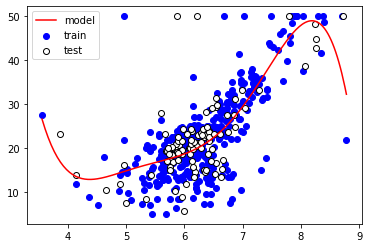

In [ ]:
# 4. Reconstruir mejor modelo acá y graficar.
degree =5
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train)

plt.scatter(X_train_f, y_train, color="blue", label="train")
plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.legend()
plt.show()

El polinomio de grado 5 ajustó muy bien en ambos tipos de datos (entrenamiento y evaluacion). Se puede observar en el gráfico anterior que los puntos siguen la línea del modelo de una mejor manera que en el gráfico de regresión lineal. Sin embargo, existe una cierta dispersión de los datos para valores intermedios de número de habitaciones, por lo que la calidad del modelo no es del todo óptima. Este modelo podría mejorarse incorporando otras features que expliquen el valor de las propiedades en Boston.

### Regresion polinomial con datos escalados:

Para 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max = MinMaxScaler()

data_minmax = data.copy()
data_minmax = min_max.fit_transform(data_minmax)
data_minmax

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        1.00000000e+00, 8.96799117e-02, 4.22222222e-01],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.00000000e+00, 2.04470199e-01, 3.68888889e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        9.89737254e-01, 6.34657837e-02, 6.60000000e-01],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.07891832e-01, 4.20000000e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        9.91300620e-01, 1.31070640e-01, 3.77777778e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.69701987e-01, 1.53333333e-01]])

In [ ]:
column_names = list(data.columns)
column_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [ ]:
data_minmax = pd.DataFrame(data_minmax, columns= column_names)
data_minmax

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


In [ ]:
feature = 'RM'
X = data_minmax[[feature]]
y = data_minmax.MEDV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [ ]:
# 1. Resolver acá.    #VAMOS A UTILIZAR EL ATRIBUTO RM
feature = 'RM'  
selector = (boston['feature_names'] == feature)

X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]

X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [ ]:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

In [ ]:
# 1. Resolver acá.    #VAMOS A UTILIZAR EL ATRIBUTO RM
# feature = 'RM'  
# selector = (boston['feature_names'] == feature)

# X_train_f = X_train[:, selector]
# X_test_f = X_test[:, selector]

# X_train_f.shape, X_test_f.shape

In [ ]:
X_train_f = X_train
X_test_f = X_test

In [ ]:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

ValueError: ignored

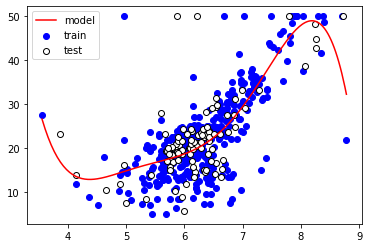

In [ ]:
# 4. Reconstruir mejor modelo acá y graficar.
degree =5
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train)

plt.scatter(X_train_f, y_train, color="blue", label="train")
plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.legend()
plt.show()

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [ ]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'CRIM') | (boston['feature_names'] == 'RM')| (boston['feature_names'] == 'LSTAT')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 3), (102, 3))

In [ ]:
 y_train.shape

(404,)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

train_errors = []
test_errors = []
degrees = [1, 2, 3, 4, 5]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)                           
    model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

In [ ]:
train_errors, test_errors

([27.786404734031777,
  15.833819610510538,
  12.288848370247354,
  8.381414788119011,
  7.811617923458671],
 [38.75831314024687,
  31.846827587450694,
  52.84915450477696,
  43.43722720225445,
  402.47333690697656])

In [ ]:
def curva_error(degrees,train_errors,test_errors,valor_optimo):
    plt.plot(degrees, train_errors, color="blue", label="train")
    plt.plot(degrees, test_errors, color="red", label="test")
    plt.axvline(x=valor_optimo,color='b', linestyle='--')
    plt.title("Variación del error para train y test según el grado del polinomio")
    plt.xlabel("degree")
    plt.ylabel("error")                           
    plt.show()
    
    return

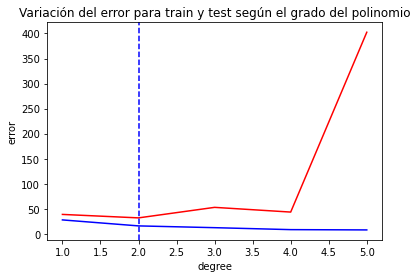

In [ ]:
curva_error(degrees,train_errors,test_errors,2)

Si agregamos dos variables extra (CRIM y LSTAT) observamos que el mejor modelo es aquel que presenta grado de polinomio 2, ya que a partir del grado 3 comienza a subir el error de test, la línea roja.  

In [ ]:
##Mejor modelo grado de polinomio 2

degree =2
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False) 
model = make_pipeline(pf, lr)


In [ ]:
model.fit(X_train_fs, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [ ]:
lr.coef_

array([ 6.53273371e+01,  2.22101786e+00, -1.61332595e+01, -8.90400191e-01,
        4.91808529e-03, -3.12676166e-01, -3.71434308e-02,  1.76581959e+00,
       -7.67139462e-02,  2.90646524e-02])

In [ ]:
lr.intercept_

0.0

3. Al tratarse de una regresión polinomial, se observan mejores resultados comparado con la regresión lineal. A su vez, la regresión con más de un atributo fue considerablemente mejor que la regresión utilizando solamente la variable RM. Esto puede comprobarse al comparar los errores de entrenamiento y evaluación, por ejemplo. Al incluir CRIM y LSTAT al modelo, se observo una disminución de ambos errrores. En el caso del error de entrenamiento, pasó  de 33.13 en el modelo que solo consideraba a RM a 15.83 en este modelo que se incorporaron CRIM y LSTAT. Por otro lado, el error de evaluación pasó de 41.04 a 31.85, por lo que se podría concluir que el agregado de estas dos variables fue relevante y positivo para la estimación del valor de las casas en el dataset de Boston. 

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
